Explore the neighborhoods in the city of Miami FL in order to determine a recommended location for a new restaurant

First import the libraries we need

In [4]:
#Un-comment if needed
!pip install beautifulsoup4
!pip install lxml
!pip install requests
!pip install geopy
!pip install folium

#Import libraries

from bs4 import BeautifulSoup
import requests

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# import k-means from clustering stage
from sklearn.cluster import KMeans

import re # regular expression library

import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

import matplotlib.cm as cm
import matplotlib.colors as colors

from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

import math

print('Libraries imported.')

    100% |████████████████████████████████| 92kB 20.2MB/s 
/bin/sh: 1: conda: not found
/bin/sh: 1: conda: not found


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Libraries imported.


Now download the data for Miami city neighborhoods

In [5]:
!wget -q -O 'miami_data.html' https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami
print('Data downloaded!')

Data downloaded!


Use BeautifulSoup to extract data from downloaded data

In [6]:
with open('miami_data.html') as html_file:
    tsoup = BeautifulSoup(html_file,'lxml')
#print(tsoup.prettify())

In [7]:
datacols = []
for th in tsoup.find_all('th'):
    datacols.append(th.text.rstrip())
    


In [8]:
alldata = []
datarows = []
for td in tsoup.find_all('td'):
    alldata.append(td.text.rstrip())
    
rowlen = 6
numrows = 25

for rnum in range(0,numrows):
    row=[]
    for i in range(0,rowlen):
        row.append(alldata[i+rnum*rowlen])
    datarows.append(row)


Now create Dataframe from extracted data. Drop data not needed.

In [9]:
dfMiami = pd.DataFrame(datarows,columns=datacols[0:6])
dfMiami.drop('Demonym',axis=1,inplace=True)
dfMiami.drop('Sub-neighborhoods',axis=1,inplace=True)


dfMiami.drop(dfMiami.index[dfMiami['Neighborhood'] =='Health District'],axis=0,inplace=True) #Dropped Health District
dfMiami.drop(dfMiami.index[dfMiami['Neighborhood'] =='Virginia Key'],axis=0,inplace=True) #Dropped Virginia Key

dfMiami



,Neighborhood,Population2010,Population/Km²,Coordinates
0,Allapattah,"54,289","4,401","25.815,-80.224"
1,Arts & Entertainment District,"11,033","7,948","25.799,-80.190"
2,Brickell,"31,759","14,541","25.758,-80.193"
3,Buena Vista,"9,058","3,540","25.813,-80.192"
4,Coconut Grove,"20,076","3,091","25.712,-80.257"
5,Coral Way,"35,062","4,496","25.750,-80.283"
6,Design District,"3,573","3,623","25.813,-80.193"
7,Downtown,"71,000 (13,635 CBD only)","10,613","25.774,-80.193"
8,Edgewater,"15,005","6,675","25.802,-80.190"
9,Flagami,"50,834","5,665","25.762,-80.316"


Split location coordinates into latitude and longitude

In [10]:
dfMiami['Latitude'] = '0'
dfMiami['Longitude'] = '1'

for index,row in dfMiami.iterrows():
    cord = row["Coordinates"].split(',')
    if len(cord) > 1:
        lat = cord[0]
    else:
        lat = 'Not Available'
    if len(cord) > 1:
        long = cord[1]
    else:
        long = 'Not Available'
        
    dfMiami.at[index,'Latitude'] = lat
    dfMiami.at[index,'Longitude'] = long
    
    
dfMiami.drop('Coordinates',axis=1,inplace=True)

    
dfMiami

,Neighborhood,Population2010,Population/Km²,Latitude,Longitude
0,Allapattah,"54,289","4,401",25.815,-80.224
1,Arts & Entertainment District,"11,033","7,948",25.799,-80.190
2,Brickell,"31,759","14,541",25.758,-80.193
3,Buena Vista,"9,058","3,540",25.813,-80.192
4,Coconut Grove,"20,076","3,091",25.712,-80.257
5,Coral Way,"35,062","4,496",25.750,-80.283
6,Design District,"3,573","3,623",25.813,-80.193
7,Downtown,"71,000 (13,635 CBD only)","10,613",25.774,-80.193
8,Edgewater,"15,005","6,675",25.802,-80.190
9,Flagami,"50,834","5,665",25.762,-80.316


More cleanup needed. Downtown population (remove CBD  - Central Business District), Midtown populations Coconut Grove location

In [11]:
dfMiami['Latitude'] = dfMiami['Latitude'].astype('float64') 
dfMiami['Longitude'] = dfMiami['Longitude'].astype('float64')
 
dfMiami.at[dfMiami.index[dfMiami['Neighborhood'] =='Downtown'],'Population2010'] = 71000
dfMiami.at[dfMiami.index[dfMiami['Neighborhood'] =='Midtown'],'Population2010'] = 24870
dfMiami.at[dfMiami.index[dfMiami['Neighborhood'] =='Midtown'],'Population/Km²'] = 32932

dfMiami.at[dfMiami.index[dfMiami['Neighborhood'] =='Coconut Grove'],'Latitude'] = 25.727610
dfMiami.at[dfMiami.index[dfMiami['Neighborhood'] =='Coconut Grove'],'Longitude'] = -80.243822

dfMiami


,Neighborhood,Population2010,Population/Km²,Latitude,Longitude
0,Allapattah,"54,289","4,401",25.81500,-80.224000
1,Arts & Entertainment District,"11,033","7,948",25.79900,-80.190000
2,Brickell,"31,759","14,541",25.75800,-80.193000
3,Buena Vista,"9,058","3,540",25.81300,-80.192000
4,Coconut Grove,"20,076","3,091",25.72761,-80.243822
5,Coral Way,"35,062","4,496",25.75000,-80.283000
6,Design District,"3,573","3,623",25.81300,-80.193000
7,Downtown,71000,"10,613",25.77400,-80.193000
8,Edgewater,"15,005","6,675",25.80200,-80.190000
9,Flagami,"50,834","5,665",25.76200,-80.316000


Add income and crime data

In [12]:
!wget -O miami_hoods.csv https://raw.githubusercontent.com/peterjmcg/Coursera_Capstone/master/MiamiHoods.csv

--2019-03-21 21:31:06--  https://raw.githubusercontent.com/peterjmcg/Coursera_Capstone/master/MiamiHoods.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.124.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.124.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 606 [text/plain]
Saving to: ‘miami_hoods.csv’

miami_hoods.csv     100%[===================>]     606  --.-KB/s    in 0s      

2019-03-21 21:31:06 (4.20 MB/s) - ‘miami_hoods.csv’ saved [606/606]



In [13]:
fname = 'miami_hoods.csv'

#Read csv
dfHoods = pd.read_csv(fname,error_bad_lines=False)
print ("Shape of dataset: ", dfHoods.shape)

dfHoods.head(5)

Shape of dataset:  (23, 3)


,Neighborhood,Average Income,Crime Index
0,Allapattah,25700,447.9
1,Arts & Entertainment District,31125,447.9
2,Brickell,44154,447.9
3,Buena Vista,33666,447.9
4,Coconut Grove,77865,447.9


In [14]:
# Merge new data with existing dataframe
dfMiami_merged = dfMiami
dfMiami_merged = dfMiami_merged.join(dfHoods.set_index('Neighborhood'), on='Neighborhood')

dfMiami_merged

,Neighborhood,Population2010,Population/Km²,Latitude,Longitude,Average Income,Crime Index
0,Allapattah,"54,289","4,401",25.81500,-80.224000,25700,447.9
1,Arts & Entertainment District,"11,033","7,948",25.79900,-80.190000,31125,447.9
2,Brickell,"31,759","14,541",25.75800,-80.193000,44154,447.9
3,Buena Vista,"9,058","3,540",25.81300,-80.192000,33666,447.9
4,Coconut Grove,"20,076","3,091",25.72761,-80.243822,77865,447.9
5,Coral Way,"35,062","4,496",25.75000,-80.283000,41603,447.9
6,Design District,"3,573","3,623",25.81300,-80.193000,53230,447.9
7,Downtown,71000,"10,613",25.77400,-80.193000,41273,447.9
8,Edgewater,"15,005","6,675",25.80200,-80.190000,37205,447.9
9,Flagami,"50,834","5,665",25.76200,-80.316000,37708,447.9


Create a map of Miami with neighborhoods marked

In [15]:
# create map of Miami using latitude and longitude values
latitude = 25.7617
longitude = -80.1918

map_Miami = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(dfMiami['Latitude'], dfMiami['Longitude'], dfMiami['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=100,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Miami)  
    
map_Miami



Now get location data from Foursquare.

In [16]:
CLIENT_ID = 'GBLG342Y3PHJQUSLATKNBBHOJTHG4OUMABBTAIE32YQZDYXG' # your Foursquare ID
CLIENT_SECRET = 'HUKODZGFDWNJLZQSGBFZVPWKDBWEOEQE53WCLR4HOZ3QFI1K' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
radius = 100

Define a function to get nearby venues.

In [17]:
LIMIT = 100
radius = 100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            '20180605', 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Get information on venues in the neighborhoods

In [18]:
miami_venues = getNearbyVenues(names=dfMiami['Neighborhood'],
                                   latitudes=dfMiami['Latitude'],
                                   longitudes=dfMiami['Longitude'])
miami_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allapattah,25.815,-80.224,Three Fingers Liquor & Lounge,25.815523,-80.224406,Lounge
1,Allapattah,25.815,-80.224,Ribs On Deck,25.813065,-80.224282,American Restaurant
2,Allapattah,25.815,-80.224,Ross,25.815820,-80.221753,Department Store
3,Allapattah,25.815,-80.224,Showtime Boxing Gym,25.812364,-80.224504,Boxing Gym
4,Allapattah,25.815,-80.224,noor market,25.818165,-80.224197,Convenience Store


In [19]:
miami_venues['Venue Category'].unique()

array(['Lounge', 'American Restaurant', 'Department Store', 'Boxing Gym',
       'Convenience Store', 'Art Gallery', 'Cupcake Shop', 'Wine Shop',
       'Spa', 'French Restaurant', 'Restaurant',
       'Paper / Office Supplies Store', 'Sandwich Place', 'Gym', 'Park',
       'Ice Cream Shop', 'Cuban Restaurant', 'Pizza Place',
       'Salon / Barbershop', 'Tapas Restaurant', 'Smoothie Shop',
       'Coffee Shop', "Women's Store", 'Food Truck', 'Hotel',
       'Argentinian Restaurant', 'Steakhouse', 'Japanese Restaurant',
       'Spanish Restaurant', 'Italian Restaurant', 'Dog Run', 'Café',
       'Latin American Restaurant', 'Athletics & Sports', 'Pharmacy',
       'Scenic Lookout', 'Seafood Restaurant', 'Gym / Fitness Center',
       'Mediterranean Restaurant', 'Burger Joint', 'Nightclub',
       'Juice Bar', 'Venezuelan Restaurant', 'Salad Place',
       'Mexican Restaurant', 'Bar', 'New American Restaurant',
       'Playground', 'Bank', 'Light Rail Station',
       'Residential Build

Now filter out the restaurants

In [20]:
miami_rest = miami_venues.loc[miami_venues['Venue Category'].str.contains("Restaurant")]
miami_rest.reset_index(drop=True,inplace=True)
miami_rest.head(20)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allapattah,25.815,-80.224,Ribs On Deck,25.813065,-80.224282,American Restaurant
1,Arts & Entertainment District,25.799,-80.190,Jack's Home Cooking,25.800447,-80.191031,American Restaurant
2,Arts & Entertainment District,25.799,-80.190,La Provence French Bakery,25.798969,-80.189127,French Restaurant
3,Arts & Entertainment District,25.799,-80.190,Plant Food + Wine Miami,25.800452,-80.192805,Restaurant
4,Arts & Entertainment District,25.799,-80.190,Latin Cafe 2000,25.801025,-80.188909,Cuban Restaurant
5,Arts & Entertainment District,25.799,-80.190,NOA Catering,25.803114,-80.190942,Restaurant
6,Arts & Entertainment District,25.799,-80.190,Rincon Escondido Cafe,25.802719,-80.189102,Tapas Restaurant
7,Brickell,25.758,-80.193,PM Buenos Aires Fish & Steak•House,25.758777,-80.193550,Argentinian Restaurant
8,Brickell,25.758,-80.193,Obba Sushi & More,25.756834,-80.191018,Japanese Restaurant
9,Brickell,25.758,-80.193,Valentia Miami,25.759320,-80.192564,Restaurant


Now examine each neighborhood for restaurant saturation

In [21]:
len(miami_rest['Neighborhood'].unique())


22

In [22]:
#Create list of dataframes, one for each neighborhood
hood_df=[]
for h in list(miami_rest['Neighborhood'].unique()):
    hoo_rest = miami_rest.loc[miami_rest['Neighborhood'].isin([h])]
    hoo_rest.reset_index(drop=True,inplace=True)
    dfHoodata = dfMiami_merged.loc[dfMiami_merged['Neighborhood'].isin([h])].join(hoo_rest.set_index('Neighborhood'), on='Neighborhood')
    dfHoodata.drop('Latitude',axis=1,inplace=True)
    dfHoodata.drop('Longitude',axis=1,inplace=True)
    dfHoodata.reset_index(drop=True,inplace=True)
    hood_df.append(dfHoodata)
    
print("Length of hood_df is", len(hood_df))


Length of hood_df is 22


In [23]:
#Now find density of restaurants in each neighborhood
#Calculate index for restaurant saturation

hood_density = []
dfMiami_merged['Density Index'] = 0
for h in hood_df:
    dindex = round(len(h.index)*100/math.pi,2)
    hname = h.at[0,'Neighborhood']
    #Add to dfMiami_merged
    dfMiami_merged.at[dfMiami_merged.index[dfMiami_merged['Neighborhood'] ==hname],'Density Index'] = dindex
    #print("Density index for ", hname, "is ", dindex )
dfMiami_merged  

,Neighborhood,Population2010,Population/Km²,Latitude,Longitude,Average Income,Crime Index,Density Index
0,Allapattah,"54,289","4,401",25.81500,-80.224000,25700,447.9,31.83
1,Arts & Entertainment District,"11,033","7,948",25.79900,-80.190000,31125,447.9,190.99
2,Brickell,"31,759","14,541",25.75800,-80.193000,44154,447.9,763.94
3,Buena Vista,"9,058","3,540",25.81300,-80.192000,33666,447.9,286.48
4,Coconut Grove,"20,076","3,091",25.72761,-80.243822,77865,447.9,827.61
5,Coral Way,"35,062","4,496",25.75000,-80.283000,41603,447.9,31.83
6,Design District,"3,573","3,623",25.81300,-80.193000,53230,447.9,286.48
7,Downtown,71000,"10,613",25.77400,-80.193000,41273,447.9,763.94
8,Edgewater,"15,005","6,675",25.80200,-80.190000,37205,447.9,477.46
9,Flagami,"50,834","5,665",25.76200,-80.316000,37708,447.9,127.32


Now create agglomerative clusters

In [24]:
#Need to clean up dfMiami_merged
#Remove commas from number strings (to allow conversion)
dfMiami_merged.replace(to_replace=',', value='',regex=True,inplace=True)

#Drop zero density neighborhoods
dfMiami_merged.drop(dfMiami_merged.index[dfMiami_merged['Neighborhood'] =='Allapattah'],axis=0,inplace=True) #Dropped Allapattah
dfMiami_merged.drop(dfMiami_merged.index[dfMiami_merged['Neighborhood'] =='Venetian Islands'],axis=0,inplace=True) #Dropped Venetian Islands

#Rename columns with problematic names
dfMiami_merged.rename(columns={'Average Income': 'AverageIncome'}, inplace=True)
dfMiami_merged.rename(columns={'Crime Index': 'CrimeIndex'}, inplace=True)
dfMiami_merged.rename(columns={'Density Index': 'DensityIndex'}, inplace=True)
dfMiami_merged.rename(columns={'Population/Km²': 'PopulatePerKM2'}, inplace=True)


dfMiami_merged

,Neighborhood,Population2010,PopulatePerKM2,Latitude,Longitude,AverageIncome,CrimeIndex,DensityIndex
1,Arts & Entertainment District,11033,7948,25.79900,-80.190000,31125,447.9,190.99
2,Brickell,31759,14541,25.75800,-80.193000,44154,447.9,763.94
3,Buena Vista,9058,3540,25.81300,-80.192000,33666,447.9,286.48
4,Coconut Grove,20076,3091,25.72761,-80.243822,77865,447.9,827.61
5,Coral Way,35062,4496,25.75000,-80.283000,41603,447.9,31.83
6,Design District,3573,3623,25.81300,-80.193000,53230,447.9,286.48
7,Downtown,71000,10613,25.77400,-80.193000,41273,447.9,763.94
8,Edgewater,15005,6675,25.80200,-80.190000,37205,447.9,477.46
9,Flagami,50834,5665,25.76200,-80.316000,37708,447.9,127.32
10,Grapeland Heights,14004,4130,25.79200,-80.258000,36489,447.9,31.83


In [25]:
dfMiami_merged['PopulatePerKM2'] = dfMiami_merged['PopulatePerKM2'].astype('float64')
dfMiami_merged['AverageIncome'] = dfMiami_merged['AverageIncome'].astype('int64')

featureset = dfMiami_merged[['PopulatePerKM2',  'AverageIncome', 'CrimeIndex', 'DensityIndex']]

from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]



array([[0.17867123, 0.15894409, 0.        , 0.20000503],
       [0.39541076, 0.39339247, 0.        , 0.91999045],
       [0.03376179, 0.20466773, 0.        , 0.3200005 ],
       [0.01900128, 1.        , 0.        , 1.        ],
       [0.06518952, 0.34748889, 0.        , 0.        ]])

In [26]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.78760465 0.19361898 1.17169172 0.29737056 0.43912571
  0.74793025 0.37856459 0.16145065 0.25509239 0.27021774 0.14291037
  0.14310081 0.19398106 1.09335399 0.2744932  0.22752611 0.77082287
  0.34574319 0.1975972  0.66665693]
 [0.78760465 0.         0.7255308  0.71837199 0.9785375  0.71797225
  0.13914767 0.46054632 0.85941153 0.9912333  1.0471479  0.79393922
  0.91795797 0.88406934 0.63220769 1.04973917 0.96088003 1.06673187
  0.96485645 0.91246686 0.41408469]
 [0.19361898 0.7255308  0.         1.04650399 0.35183221 0.35205203
  0.65786781 0.26883552 0.22399155 0.32458737 0.35929834 0.08342629
  0.3134904  0.21610806 1.13737393 0.3577612  0.28618289 0.75674597
  0.34766642 0.24919143 0.52224552]
 [1.17169172 0.71837199 1.04650399 0.         1.19494941 0.81191867
  0.70788712 0.86185929 1.14180456 1.247196   1.38540601 1.11599757
  1.31102903 1.26134979 1.26297961 1.38296977 1.33218909 0.96639434
  1.12803633 1.17835981 0.76734832]
 [0.29737056 0.9785375  0.35183221 1.194

In [27]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 1, 4, 1, 0, 2, 3, 1, 1, 1, 1, 1, 1, 5, 1, 1, 0, 1, 1, 3])

In [28]:
dfMiami_merged['cluster_'] = agglom.labels_
dfMiami_merged.head()

,Neighborhood,Population2010,PopulatePerKM2,Latitude,Longitude,AverageIncome,CrimeIndex,DensityIndex,cluster_
1,Arts & Entertainment District,11033,7948.0,25.79900,-80.190000,31125,447.9,190.99,1
2,Brickell,31759,14541.0,25.75800,-80.193000,44154,447.9,763.94,2
3,Buena Vista,9058,3540.0,25.81300,-80.192000,33666,447.9,286.48,1
4,Coconut Grove,20076,3091.0,25.72761,-80.243822,77865,447.9,827.61,4
5,Coral Way,35062,4496.0,25.75000,-80.283000,41603,447.9,31.83,1


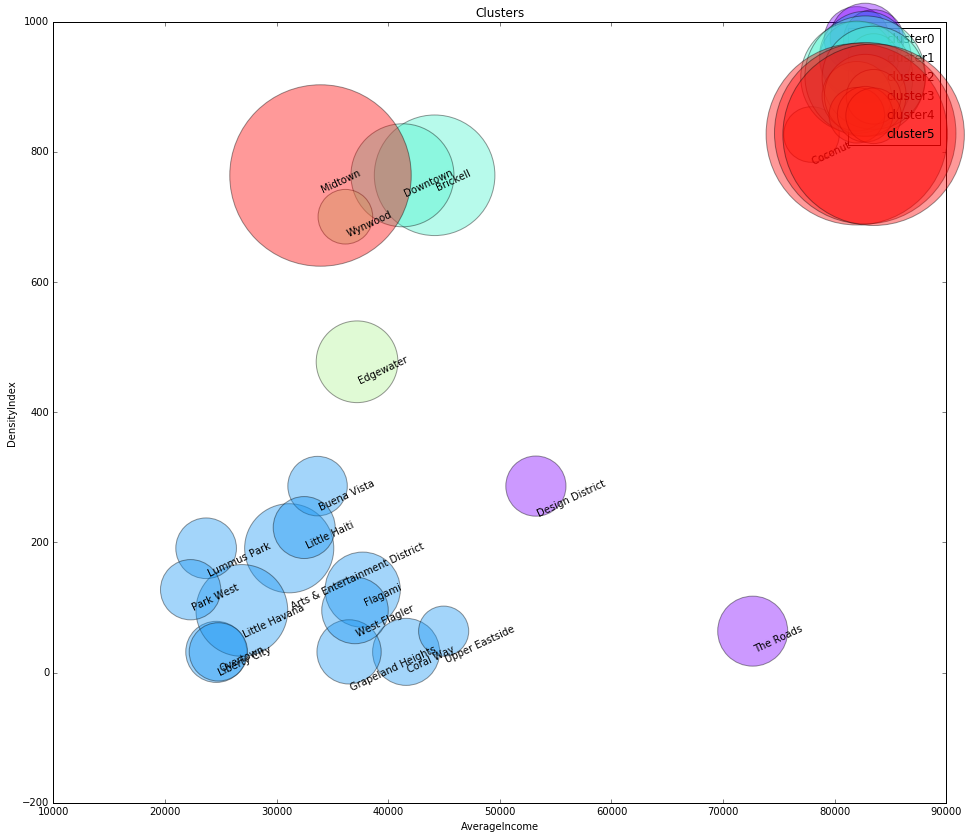

In [33]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = dfMiami_merged[dfMiami_merged.cluster_ == label]
    for i in subset.index:
            plt.text(subset.AverageIncome[i], subset.DensityIndex[i],str(subset['Neighborhood'][i]), rotation=25) 
    plt.scatter(subset.AverageIncome, subset.DensityIndex, s= subset.PopulatePerKM2, c=color, label='cluster'+str(label),alpha=0.4)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('AverageIncome')
plt.ylabel('DensityIndex')